In [1]:
import pandas as pd
df = pd.read_csv('Wholesale customers data.csv')

In [6]:
df = df.loc[df.Fresh<35000]

In [8]:
#外れ値除去
df = df.loc[df.Milk<20000]
df = df.loc[df.Grocery<30000]
df = df.loc[df.Frozen<15000]
df = df.loc[df.Detergents_Paper<16000]
df = df.loc[df.Delicassen<5000]
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


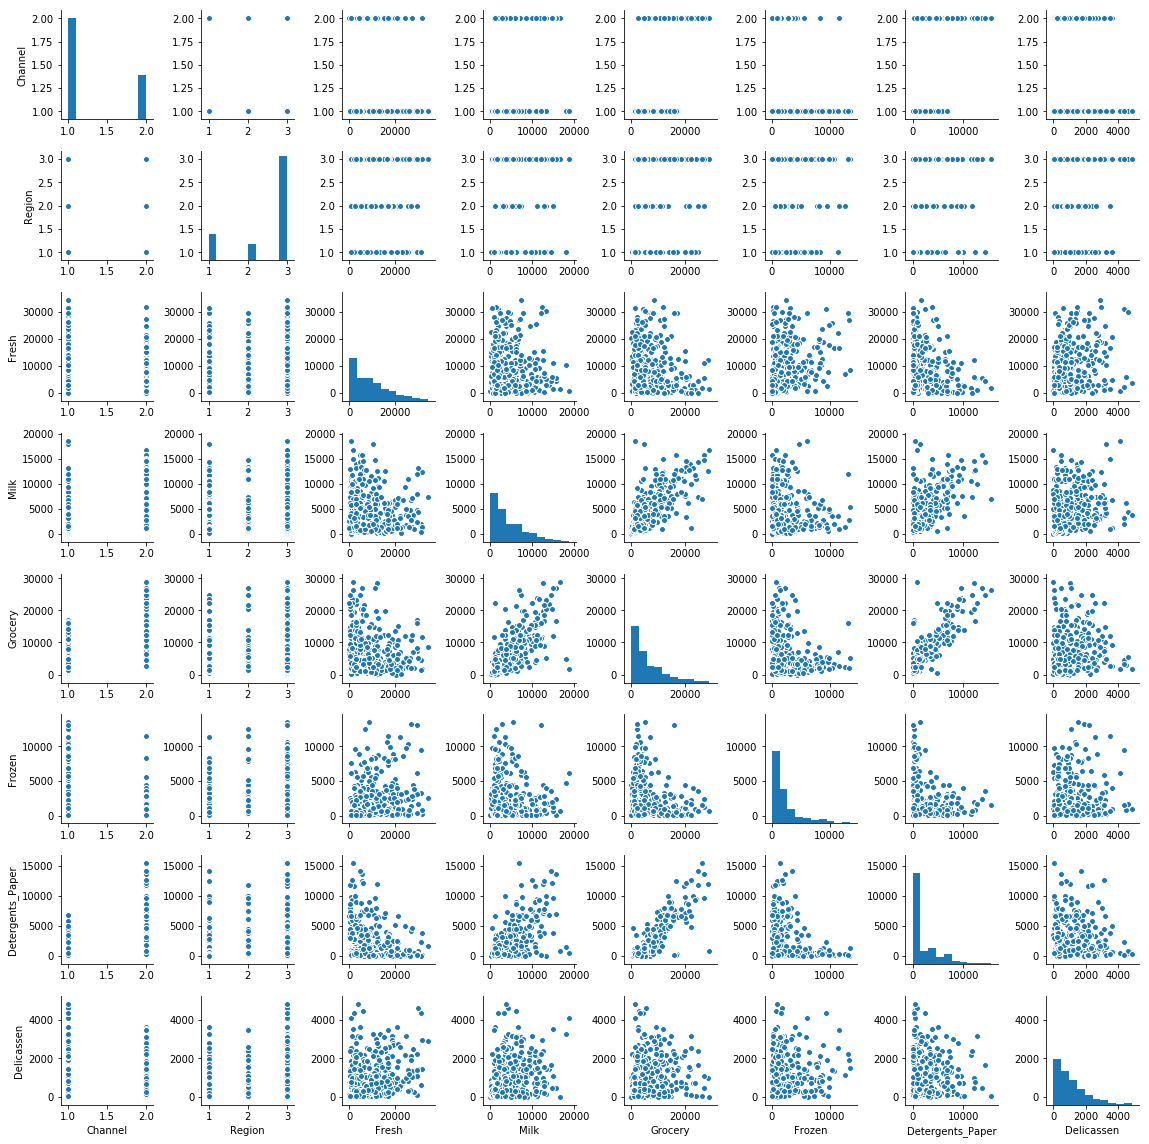

In [9]:
#散布図行列を出力
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.pairplot(df, size = 2.0)
plt.show()

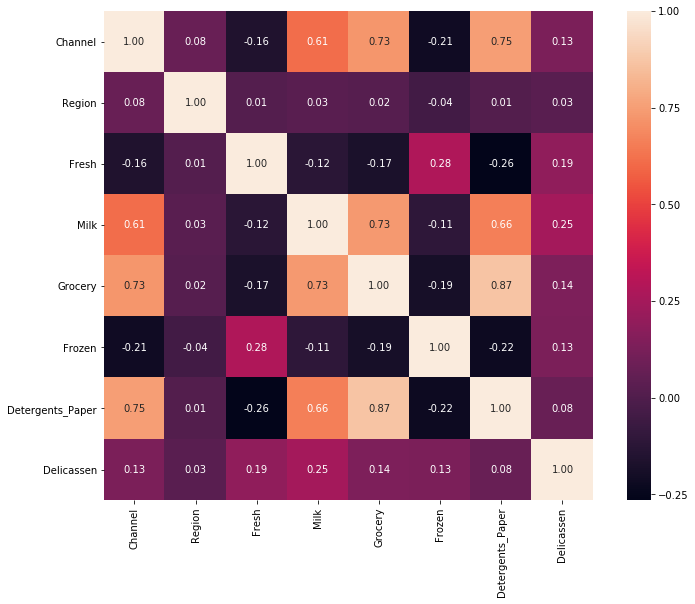

In [10]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [16]:
#Channelごと、Regionごとに分けてクラスタリングしてみる（添字はRegion,Channelの順）
df_11 = df.loc[df.Region == 1]
df_21 = df.loc[df.Region == 2]
df_31 = df.loc[df.Region == 3]

df_12 = df.loc[df.Region == 1]
df_22 = df.loc[df.Region == 2]
df_32 = df.loc[df.Region == 3]

In [17]:
#Channelごと、Regionごとに分けてクラスタリングしてみる（添字はRegion,Channelの順）
df_11 = df_11.loc[df.Channel == 1]
df_21 = df_21.loc[df.Channel == 1]
df_31 = df_31.loc[df.Channel == 1]

df_12 = df_12.loc[df.Channel == 2]
df_22 = df_22.loc[df.Channel == 2]
df_32 = df_32.loc[df.Channel == 2]

In [19]:
X_11 = df_11.loc[:, ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_21 = df_21.loc[:, ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_31 = df_31.loc[:, ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

X_12 = df_12.loc[:, ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_22 = df_22.loc[:, ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_32 = df_32.loc[:, ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

In [20]:
#データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_11)       # 与えられた行列の各特徴量について､平均と標準偏差を算出
scaler.fit(X_21)    
scaler.fit(X_31)

scaler.fit(X_21)
scaler.fit(X_22)    
scaler.fit(X_32)

X_11_std = scaler.fit_transform(X_11) # Xを標準化した行列を生成
X_21_std = scaler.fit_transform(X_21)
X_31_std = scaler.fit_transform(X_31)

X_12_std = scaler.fit_transform(X_12)
X_22_std = scaler.fit_transform(X_22)
X_32_std = scaler.fit_transform(X_32)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=6) # 主成分を2つまで取得
X_11_pca = pca.fit_transform(X_11_std)
print(pca.explained_variance_ratio_)
X_21_pca = pca.fit_transform(X_21_std)
print(pca.explained_variance_ratio_)
X_31_pca = pca.fit_transform(X_31_std)
print(pca.explained_variance_ratio_)

X_12_pca = pca.fit_transform(X_12_std)
print(pca.explained_variance_ratio_)
X_22_pca = pca.fit_transform(X_22_std)
print(pca.explained_variance_ratio_)
X_32_pca = pca.fit_transform(X_32_std)
print(pca.explained_variance_ratio_)

[ 0.36918942  0.25085078  0.1529522   0.09769802  0.07763904  0.05167053]
[ 0.29810863  0.26094619  0.18916199  0.12887138  0.06992495  0.05298686]
[ 0.35124624  0.2589451   0.1371394   0.11517896  0.08742027  0.05007003]
[ 0.49371673  0.17427036  0.14973699  0.13102452  0.03862712  0.01262428]
[ 0.48941631  0.22342612  0.11194582  0.10660007  0.06279396  0.00581772]
[ 0.3864549   0.20928196  0.15408868  0.12024011  0.09131601  0.03861834]


In [23]:
# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_11_km = km.fit_predict(X_11_pca[:, 0:2])
y_21_km = km.fit_predict(X_21_pca[:, 0:2])
y_31_km = km.fit_predict(X_31_pca[:, 0:2])

y_11_km = km.fit_predict(X_12_pca[:, 0:2])
y_21_km = km.fit_predict(X_22_pca[:, 0:2])
y_31_km = km.fit_predict(X_32_pca[:, 0:2])

In [26]:
# クラスタリングの結果を出力
import matplotlib.pyplot as plt
% matplotlib inline

# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

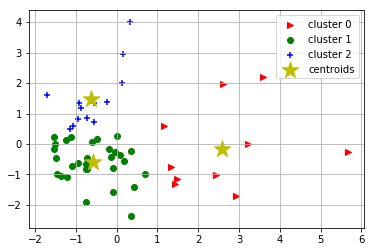

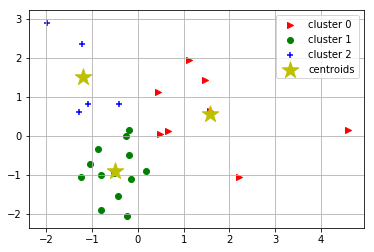

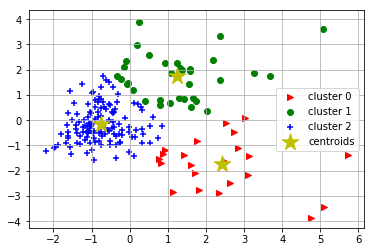

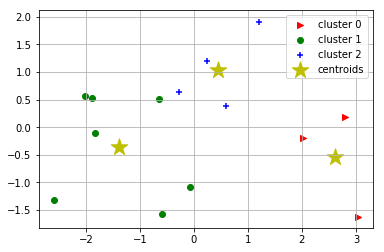

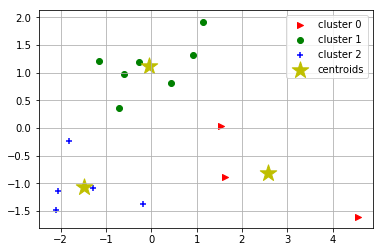

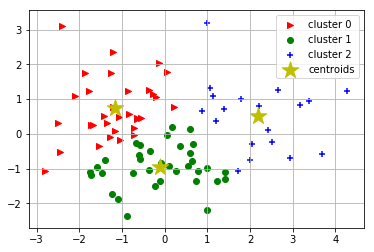

In [27]:
#プロットを実行
kmeans_plot(3, km, X_11_pca[:, 0:2])
kmeans_plot(3, km, X_21_pca[:, 0:2])
kmeans_plot(3, km, X_31_pca[:, 0:2])

kmeans_plot(3, km, X_12_pca[:, 0:2])
kmeans_plot(3, km, X_22_pca[:, 0:2])
kmeans_plot(3, km, X_32_pca[:, 0:2])

In [28]:
from sklearn.metrics import silhouette_samples

# 全サンプルのシルエット係数を計算
# (X, y_km, 利用する距離の種類)
# 'euclidiean' はユークリッド距離
s = silhouette_samples(X_pca[:, 0:2], y_km, metric='euclidean')

NameError: name 'X_pca' is not defined